##### Dealing with image classification 
##### Step 1: if images are in different dimensions ,resize all the image to the same dimension 
##### RGB has 3 channels
##### Grayscale has one 1 channel
##### Step 2: then build label focused images
##### Step 3 : then we can split data into training data and test data
##### Step 4 : Pass it to neural network
##### step once training is done we can test 

##### Here we give handwritten digit image and it should predict

In [29]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [31]:
#importing the dependencies
import numpy as np
import matplotlib.pyplot as plt  #visualise image
import seaborn as sns
import cv2 #computervision
from PIL import Image #imageprocessing task 
import tensorflow as tf
tf.random.set_seed(3)  #when you train the nn ,there are some random values are generated so if you set the number randommnes no longer exists, we can give any number
from tensorflow import keras # keras help to easily create NN
from keras.datasets import mnist
from tensorflow.math import confusion_matrix



In [32]:
#loading mnist data from keras.datasets
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [33]:
type(X_train)

numpy.ndarray

In [34]:
#shape of numpy array
print((X_train.shape,Y_train.shape,X_test.shape,Y_test.shape))

#X_train contains 60000 images and each image has dimension of 28*28 
#all labels are stored in training set of X and Y, here test data is 10,000
# as channel is not mentioned means its grayscale so 1 channel

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


In [35]:
#printing 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [36]:
X_train[10].shape

(28, 28)

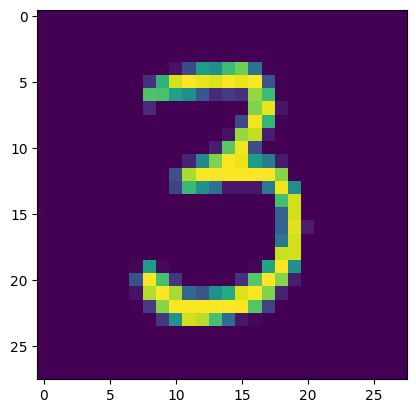

3


In [37]:
#displaying the image 
plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(Y_train[50])

Imagelabels

In [38]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [39]:
#uniques values in Y_train
print(np.unique(Y_train))


#uniques values in Y_test
print(np.unique(Y_test))

                

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

### All the images have same dimension in this dataset ,if not we need to resize it to same dimension 

In [40]:
# Scaling the values means normalising the data to make the data in the same range i.e 0 and 1

X_train = X_train/255
X_test = X_test/255



In [41]:
#displaying the image 
print(X_train[10])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

#### Building the Neural Network

In [42]:
#setting some layers of the neural network 

model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),  #input_shape is input dimension
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])

c:\Users\Priyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
#compiling the neural network 
model.compile(optimizer='adam',   #discover most optimum parameters
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [44]:
#training the neural network 

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8479 - loss: 0.5204
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9541 - loss: 0.1522
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9669 - loss: 0.1088
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9743 - loss: 0.0856
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0697
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9819 - loss: 0.0594
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9843 - loss: 0.0499
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0433
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9882 - loss: 0.0387
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9896 - loss: 0.0340


training data accuracy is 97%



#### Accuracy on test data

In [45]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1406
0.9700999855995178


#### Test data accuracy = 96%

In [46]:
print(X_test.shape)

(10000, 28, 28)


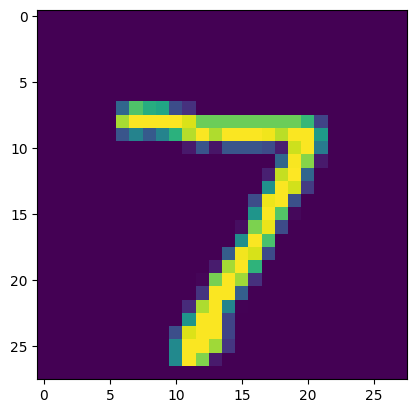

In [47]:
#First data point in X_test

plt.imshow(X_test[0])
plt.show()

In [48]:
print(Y_test[0])

7


In [49]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [50]:
Y_pred.shape   

(10000, 10)

In [51]:
print(Y_pred[0])   

[1.47653816e-06 1.31262168e-01 6.68152198e-02 8.91282141e-01
 9.68702878e-08 1.45657989e-03 1.40052159e-09 9.99999881e-01
 1.21852625e-02 4.83941287e-01]


model.predict()  gives the prediction probability for each class for that data point

In [52]:
#converting the prediction probabilities to class label
#above Y_pred gives the probability of [0,1,2,3,4,5,6,7,8,9]
#argmax predicts pobability for 1000 images

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [53]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [54]:
print(Y_pred)

[[1.47653816e-06 1.31262168e-01 6.68152198e-02 ... 9.99999881e-01
  1.21852625e-02 4.83941287e-01]
 [5.69885969e-02 9.99935627e-01 1.00000000e+00 ... 7.21640674e-07
  9.80361998e-01 5.36559130e-10]
 [4.18543816e-03 9.99897003e-01 2.24068150e-01 ... 5.74212313e-01
  4.91155267e-01 6.82679762e-04]
 ...
 [9.65467723e-12 5.20020762e-07 8.82016682e-10 ... 3.52483056e-02
  2.65037408e-04 9.98487055e-01]
 [7.02736861e-06 1.66678165e-05 4.23399307e-08 ... 2.82192184e-03
  9.99976873e-01 1.52414330e-04]
 [1.61542207e-01 8.36944766e-03 1.09955678e-02 ... 9.55794440e-06
  6.65416053e-07 5.49641044e-09]]


#### Y_test  => True labels
#### Y_pred_labels => predicted by neural network


##### Confusion Matrix

In [55]:
conf_matrix = confusion_matrix(Y_test,Y_pred_labels)

In [56]:
print(conf_matrix)

tf.Tensor(
[[ 955    0    1    3    0    1    3    2    1   14]
 [   0 1117    3    3    1    1    3    2    5    0]
 [   4    0  995   11    1    0    6    4    8    3]
 [   0    0    2  994    0    2    0    6    2    4]
 [   0    0    4    0  967    0    5    1    2    3]
 [   1    1    0   21    2  841    4    1    8   13]
 [   3    3    2    2    2   10  933    0    2    1]
 [   1    2    4    3    2    0    0 1001    1   14]
 [   0    0    3   14    6    4    5    6  930    6]
 [   0    2    0    5   26    2    0    5    1  968]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

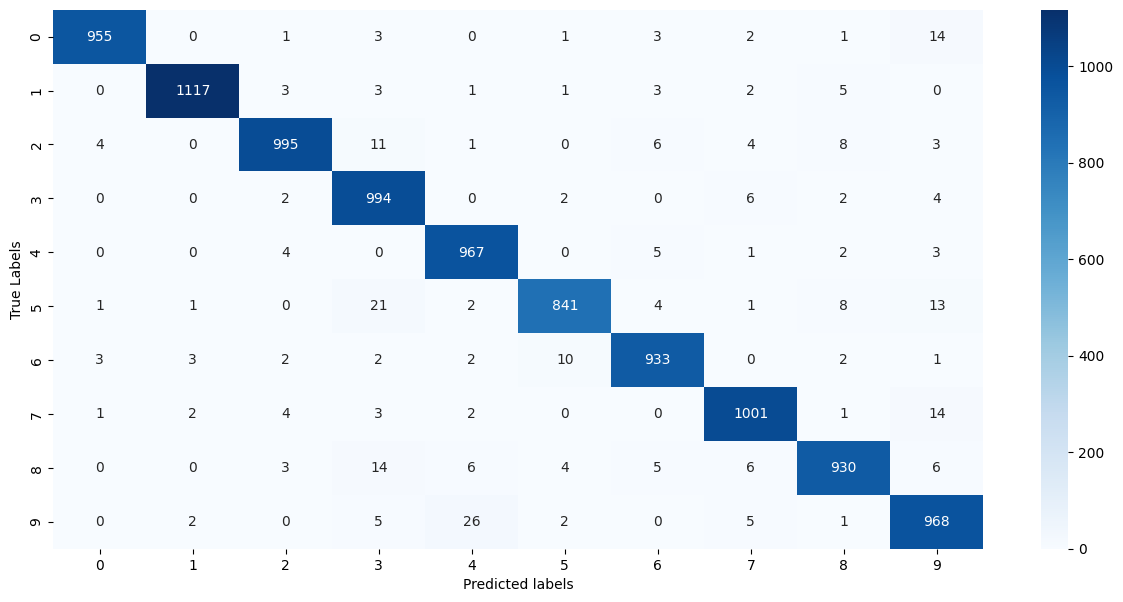

In [57]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')


plt.ylabel('True Labels')
plt.xlabel('Predicted labels')

### Building predicting model

In [58]:
import cv2

In [59]:
input_image_path = 'MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [60]:
type(img)

numpy.ndarray

In [61]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [62]:
cv2.imshow('RGB Image', input_image)
cv2.waitKey(0)

-1

In [63]:
print(input_image.shape)

(318, 318, 3)


In [64]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [65]:
grayscale.shape

(318, 318)

In [66]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [67]:
input_image_resize.shape

(28, 28)

In [68]:
cv2.imshow('GRAYScale Image', input_image_resize)
cv2.waitKey(0)

-1

In [69]:
input_image_resize = input_image_resize/255


In [70]:
type(input_image_resize)

numpy.ndarray

In [71]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [72]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[5.1734729e-13 4.2360234e-03 1.1149177e-05 1.0000000e+00 2.0051076e-15
  5.4715469e-02 1.0334643e-16 1.2578293e-03 3.0684057e-03 9.7829747e-01]]


In [73]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3
